<a href="https://colab.research.google.com/github/ansam304/Prediction-of-Product-Sales/blob/main/Copy_of_Prediction_of_Poduct_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales)
 - Auther: Ansam Aslan









 ## Project Overview


 ## Load and Inspect Data


## Imports

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
file="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 ## Clean Data

Q1: How many rows and columns?

  - `8523 rows`
  - `12 columns`

### Convert Dtypes

In [98]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [99]:
# Use .select_dtypes to view only object columns
object_col=df.select_dtypes("object").columns
object_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [100]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


Convert Outlet_Identifier

In [101]:
# Inspect the Outlet_Identifier value counts

df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [102]:
# Remove  the "OUT0" from Outlet_Identifier column by replacing it with nothing
df['Outlet_Identifier']=df['Outlet_Identifier'].str.replace("OUT0","")
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
27,935
13,932
35,930
49,930
46,930
45,929
18,928
17,926
10,555


In [103]:
# Change the datatype of Outlet_Identifier column to int
df['Outlet_Identifier']= df['Outlet_Identifier'].astype(int)
# Confirm the datatype
df['Outlet_Identifier'].dtype

dtype('int64')

Convert Item_Fat_Content

In [104]:
# Inspect the SibspItem_Fat_Content column's value counts
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [105]:
#replaced LF & low fat in Low Fat and reg in Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


###Rename Columns

In the cell below:

 - The Identifier column has been renamed to  "Item_Id"
 - The Outlet_Identifier has been renamed to "Outlet_Id"
 - The Item_MRP has been renamed to "List Price"

In [106]:
rename_dict={"Item_Identifier":"Item_Id", "Outlet_Identifier":"Outlet_Id","Item_MRP":"List Price"}
df=df.rename(rename_dict,axis=1)

df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


### Duplicate Rows

In [107]:
duplicated_rows=df.duplicated(keep=False)
duplicated_rows.sum()

np.int64(0)

There are no duplicate rows

###  Unique Identifiers

In [108]:
df.nunique()

,0
Item_Id,1559
Item_Weight,415
Item_Fat_Content,2
Item_Visibility,7880
Item_Type,16
List Price,5938
Outlet_Id,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [109]:
df.nunique()/len(df)*100

,0
Item_Id,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.023466
Item_Visibility,92.455708
Item_Type,0.187727
List Price,69.670304
Outlet_Id,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


###  Missing Values

In [110]:
null_sum=df.isna().sum()
null_sum

,0
Item_Id,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
List Price,0
Outlet_Id,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [111]:
null_sum/len(df)*100

,0
Item_Id,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
List Price,0.000000
Outlet_Id,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


<Axes: >

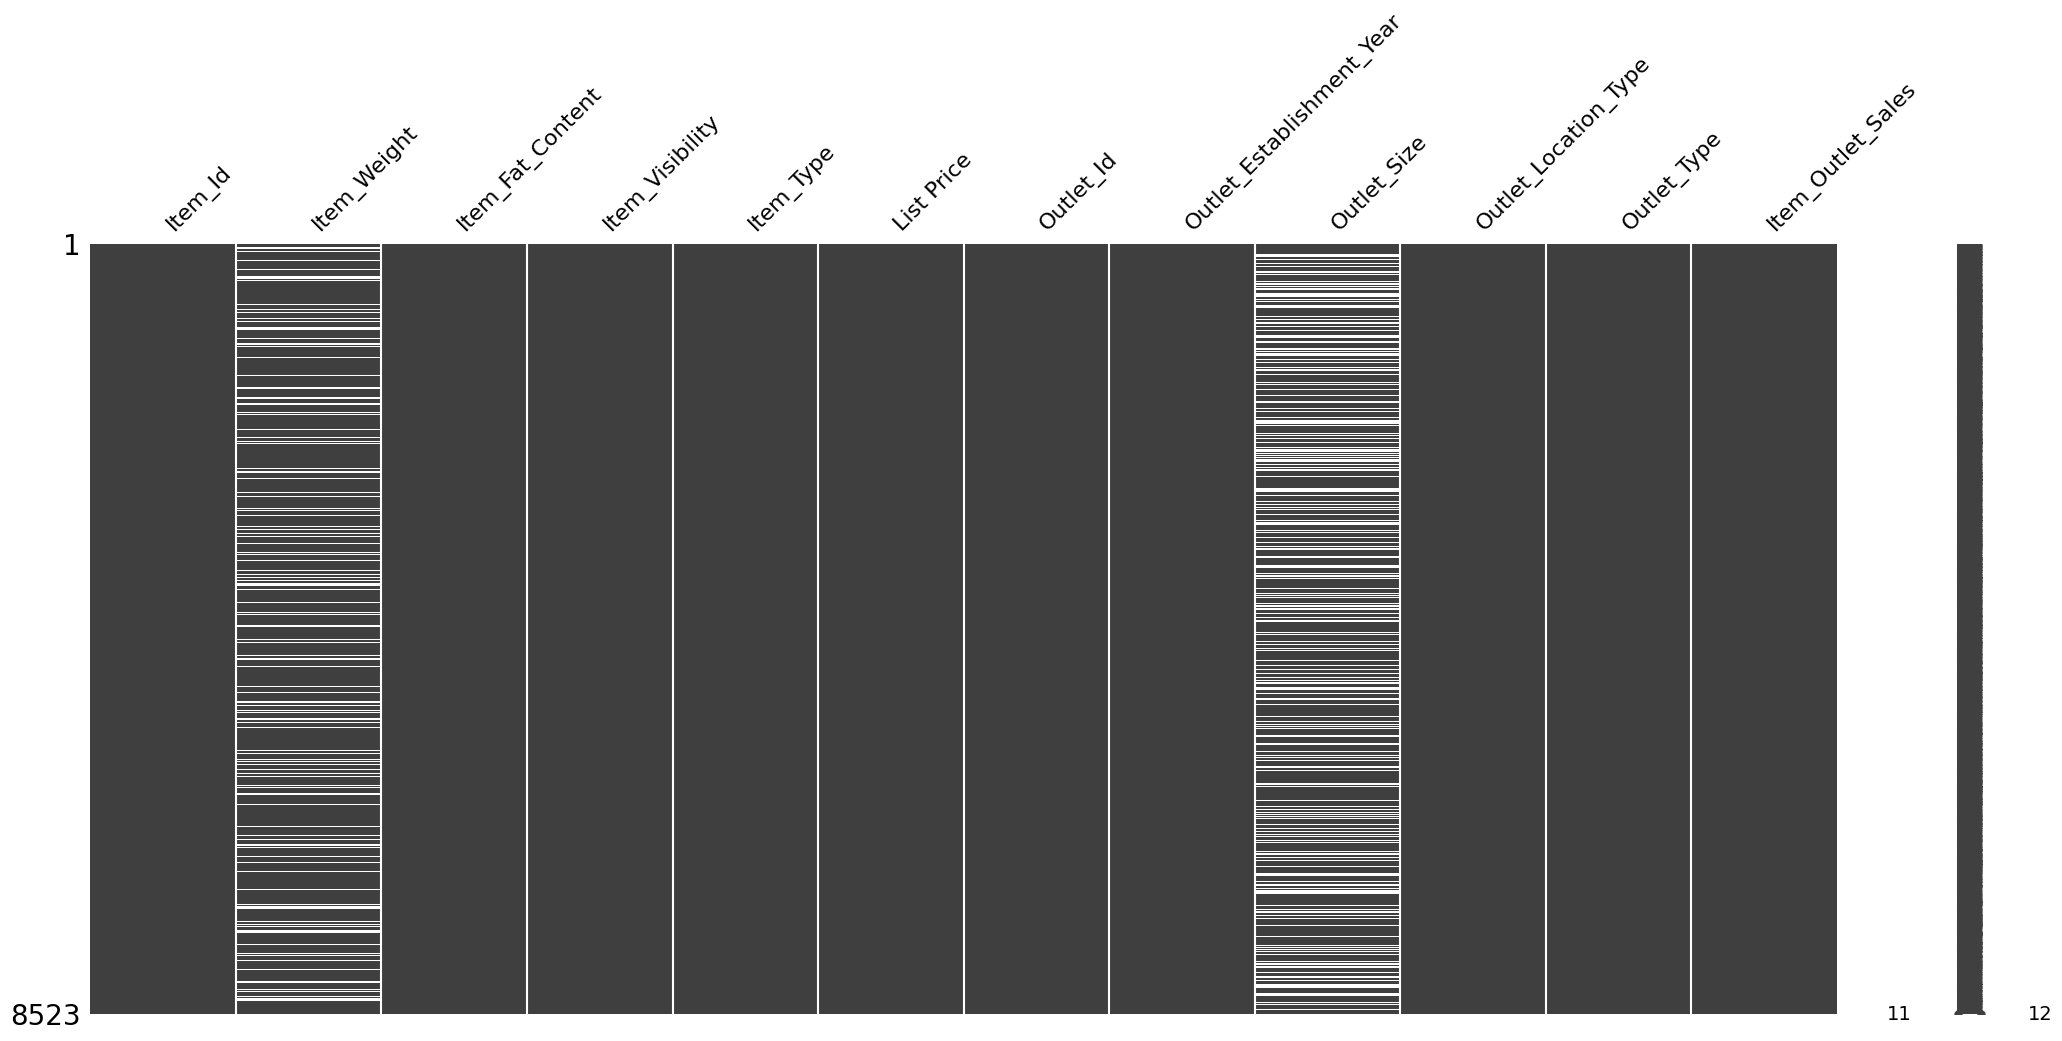

In [112]:
import missingno as msno
msno.matrix(df)

In [113]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['Item_Id', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [114]:
df[cat_col]=df[cat_col].fillna("MISSING")

In [115]:
num_col=df.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'List Price', 'Outlet_Id',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [116]:
df[num_col].describe()

,Item_Weight,Item_Visibility,List Price,Outlet_Id,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,29.108765,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,13.927648,8.371760,1706.499616
min,4.555000,0.000000,31.290000,10.000000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,17.000000,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,27.000000,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,45.000000,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,49.000000,2009.000000,13086.964800


In [117]:
Item_Visibility_zero=df['Item_Visibility']==0
Item_Visibility_zero.sum()

np.int64(526)

In [118]:
item_Visibility_mean=df['Item_Visibility'].mean()
item_Visibility_mean

np.float64(0.06613202877895108)

In [119]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, item_Visibility_mean)

In [121]:
item_weight_mean=df['Item_Weight'].mean()
item_weight_mean

np.float64(12.857645184135976)

In [122]:
df[num_col]=df[num_col].fillna(item_weight_mean)

In [123]:
df.isna().sum()

,0
Item_Id,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
List Price,0
Outlet_Id,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<Axes: >

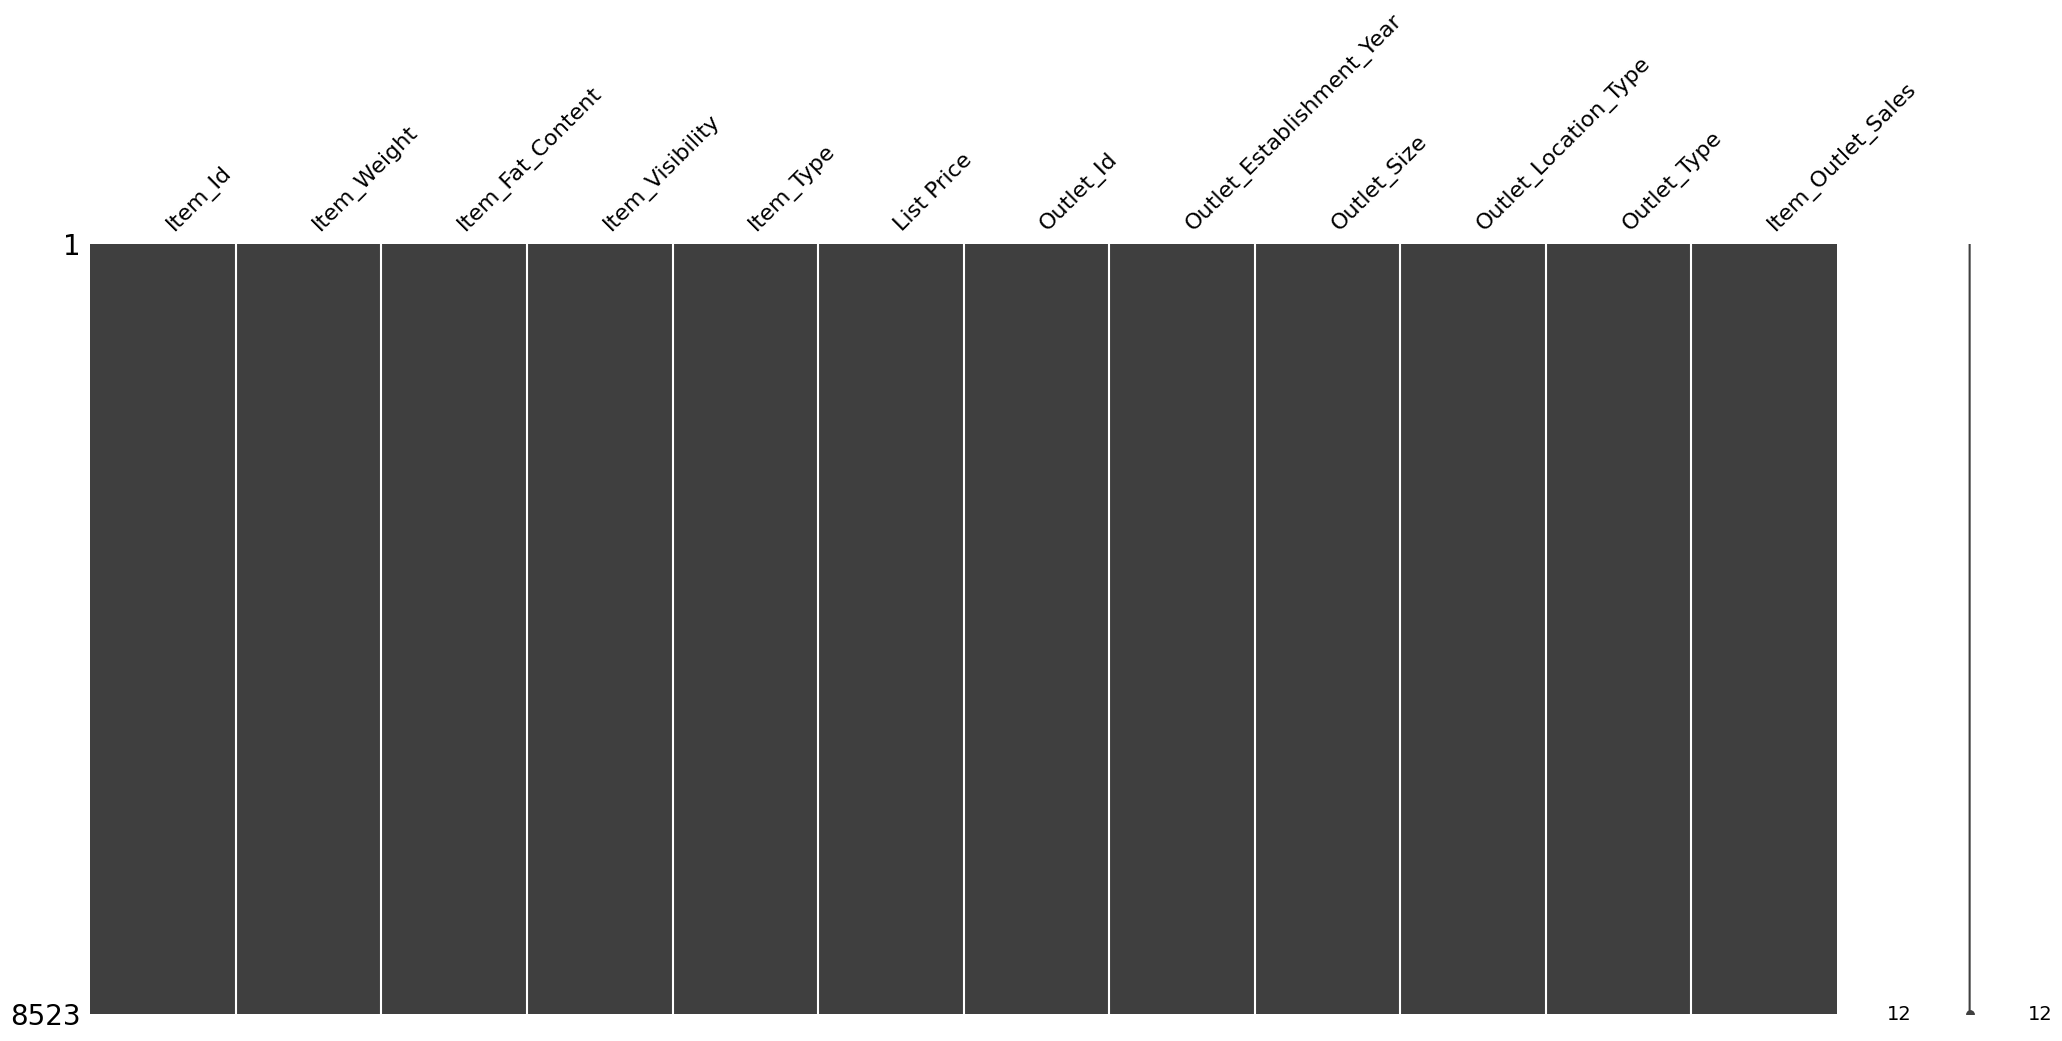

In [124]:
msno.matrix(df)

In [126]:
df.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,10,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
path="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/Prediction_of_Poduct_Sales_cleaned.csv"
df.to_csv(path,index=False)

In [130]:
dff=pd.read_csv(path)
dff.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,List Price,Outlet_Id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,10,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


 ## Exploratory Data Analysis

 ## Feature Inspection